In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

In [2]:
model = 'bert'
# df = pd.read_csv(f"{model}_bs_lr_results.csv")
df2 = pd.read_csv(f"{model}_train_only_bs_vs_optim.csv")   #bs
df3 = pd.read_csv(f"{model}_bs_lr_exp_dim.csv")        #gmd
# df4 = pd.read_csv(f"{model}_random_vs_nn_train.csv") # NN50        #random50
df4 = pd.read_csv(f"{model}_random_vs_nn_train_alt10.csv") # NN10       #random10

df5 = pd.read_csv(f"{model}_random_vs_nn_train_alt.csv") # NN250



# in df2, drop rows where cpu_bs is 0
df2.fillna(0, inplace=True)
df2 = df2[df2['observed_time_bs'] != 0]

df3.fillna(0, inplace=True)
df3 = df3[df3['algo_time'] != 0]

df4 = df4.fillna(0)
df4 = df4[df4['observed_time_random'] != 0]

df5 = df5.fillna(0)
df5 = df5[df5['observed_time_random'] != 0]

df4['num_pwds'] = 10
df5['num_pwds'] = 250
# df4

df2['power_budget'] = df2['power_budget'].astype(int)

In [3]:
bs_tries = list(df2['num_pwds'])
gmd_tries = list(df3['num_pwds'])
random_tries = list(df4['num_pwds'])
nn_tries = list(df4['num_pwds'])

# rake mean tries for all
bs_tries_mean = np.mean(bs_tries)
gmd_tries_mean = np.mean(gmd_tries)
random_tries_mean = np.mean(random_tries)
nn_tries_mean = np.mean(nn_tries)
nn_tries_mean_alt = np.mean(list(df5['num_pwds']))

mean_tries_list = [random_tries_mean, nn_tries_mean, nn_tries_mean_alt, bs_tries_mean, gmd_tries_mean]

In [4]:
mean_tries_list
# round to 1 decimal
mean_tries_list = [round(x, 1) for x in mean_tries_list]

In [5]:
new_df = pd.DataFrame({
    'observed_time_bs': df2['observed_time_bs'],
    'algo_time': df3['algo_time'],
    'nn_time': df4['observed_time_nn'],
    'random_time': df4['observed_time_random'],
    'optim_time': df3['optim_time'],
    'nn_250' : df5['observed_time_nn'],
    'power_budget': df2['power_budget']
})

new_df

,observed_time_bs,algo_time,nn_time,random_time,optim_time,nn_250,power_budget
0,NaN,NaN,NaN,NaN,NaN,7886.872314,NaN
1,NaN,NaN,NaN,NaN,NaN,4145.834229,NaN
2,NaN,NaN,NaN,NaN,NaN,3967.600952,NaN
3,NaN,NaN,NaN,NaN,NaN,3956.740845,NaN
4,NaN,NaN,NaN,NaN,NaN,2869.890259,NaN
5,NaN,NaN,NaN,NaN,NaN,2870.182251,NaN
6,7899.345703,7911.859375,0.000000,7911.859375,7884.061523,2870.182251,16.0
7,7899.345703,7887.897461,7886.872314,7865.214844,7859.490723,1785.753418,17.0
8,7899.345703,7880.335938,4145.834229,7865.214844,7850.118408,1806.018188,18.0
9,4144.670410,7878.815918,3967.600952,7859.537598,4140.625000,1806.018188,19.0


In [6]:
new_df.loc[new_df['optim_time'] == 0, ['observed_time_bs', 'algo_time', 'optim_time', 'nn_time', 'random_time']] = 0


In [7]:
import pandas as pd

nn250 = pd.DataFrame({
    'nn_250': new_df['nn_250'],
    'optim_time': new_df['optim_time']
})

gmd = pd.DataFrame({
    'algo_time': new_df['algo_time'],
    'optim_time': new_df['optim_time']
})

bs = pd.DataFrame({
    'observed_time_bs': new_df['observed_time_bs'],
    'optim_time': new_df['optim_time']
})

rnd = pd.DataFrame({
    'random_time': new_df['random_time'],
    'optim_time': new_df['optim_time']
})
rnd = rnd.fillna(0)

In [8]:
rnd['penalty'] = 100*(rnd['random_time'] - rnd['optim_time'])/rnd['optim_time']
bs['penalty'] = 100*(bs['observed_time_bs'] - bs['optim_time'])/bs['optim_time']
gmd['penalty'] =  100*(gmd['algo_time'] - gmd['optim_time'])/gmd['optim_time']
bs['penalty'] = 100*(bs['observed_time_bs'] - bs['optim_time'])/bs['optim_time']
nn250['penalty'] = 100*(nn250['nn_250'] - nn250['optim_time'])/nn250['optim_time']

In [9]:
datalist_time = [rnd['penalty'], nn250['penalty'], gmd['penalty'], bs['penalty']]

In [10]:
medians_time = [np.median(data) for data in datalist_time]
medians_time

[nan, nan, nan, nan]

In [11]:
bs_tries = list(df2['num_pwds'])
gmd_tries = list(df3['num_pwds'])
random_tries = list(df4['num_pwds'])
nn_tries = list(df4['num_pwds'])

In [12]:
bs_tries_mean = np.mean(bs_tries)
gmd_tries_mean = np.mean(gmd_tries)
random_tries_mean = np.mean(random_tries)
nn_tries_mean = np.mean(nn_tries)
nn_tries_mean_alt = np.mean(list(df5['num_pwds']))

mean_tries_list = [random_tries_mean, 100, bs_tries_mean, gmd_tries_mean]
# round to 1 decimal
mean_tries_list = [round(x, 1) for x in mean_tries_list]
mean_tries_list

[10.0, 100, 7.0, 9.2]

In [13]:
# Power

new_df = pd.DataFrame({
    'observed_power_bs': df2['observed_power_bs'],
    'algo_power': df3['algo_power'],
    'nn_power': df5['observed_power_nn'],
    'random_power': df4['observed_power_random'],
    'optim_power': df3['optim_power'],
    'power_budget': df2['power_budget']
})

bs['penalty_power'] = new_df['observed_power_bs'] - new_df['power_budget']
rnd['penalty_power'] = new_df['random_power'] - new_df['power_budget']
gmd['penalty_power'] =  new_df['algo_power'] - new_df['power_budget']
bs['penalty_power'] = new_df['observed_power_bs'] - new_df['power_budget']
nn250['penalty_power'] = new_df['nn_power'] - new_df['power_budget']

In [14]:
# rnd.dropna(inplace=True)
# gmd.dropna(inplace=True)
# bs.dropna(inplace=True)
# nn250.dropna(inplace=True)

In [15]:
# datalist_time = [rnd['penalty'], nn250['penalty'], gmd['penalty']]
# datalist_power = [rnd['penalty_power'], nn250['penalty_power'], gmd['penalty_power']]
# categories = ['RND', 'NN250', 'GMD']

# # Flatten the lists and create corresponding labels
# data_time_flat = [item for sublist in datalist_time for item in sublist]
# data_power_flat = [item for sublist in datalist_power for item in sublist]
# labels_time = [categories[i] for i, sublist in enumerate(datalist_time) for item in sublist]
# labels_power = [categories[i] for i, sublist in enumerate(datalist_power) for item in sublist]
# type_time = ['time'] * len(data_time_flat)
# type_power = ['power'] * len(data_power_flat)

# # Combine the data and labels
# combined_data = data_time_flat + data_power_flat
# combined_labels = labels_time + labels_power
# combined_types = type_time + type_power

# # Create a DataFrame
# df = pd.DataFrame({
#     'Penalty': combined_data,
#     'Strategy': combined_labels,
#     'type': combined_types
# })

# # Set the plot style
# sns.set(style="whitegrid")

# # Define custom palette colors
# colors = {'time': '#fadc6f', 'power': '#e36668'}

# # Create figure and axes
# fig, ax = plt.subplots(figsize=(6, 6))

# # Create the violin plot
# sns.violinplot(x='Strategy', y='Penalty', hue='type', data=df, palette=colors, split=True, scale="count", cut=0, ax=ax)
# ax.set_xlabel('')
# ax.set_ylabel('Distance from Optimal', fontsize=20)

# # Add dark line at y=0
# ax.axhline(0, color='black', linewidth=1)

# # Add median markers
# medians_time = [np.median(data) for data in datalist_time]
# medians_power = [np.median(data) for data in datalist_power]

# if model == 'yolo':
#     for i, median in enumerate(medians_time):
#         ax.text(i-0.4, median - 7, f"{median:.2f}", color='#635402', ha='center', va='bottom', fontsize=18)

#     for i, median in enumerate(medians_power):
#         ax.text(i+0.4, median - 0.4, f"{median:.2f}", color='#8B0000', ha='center', va='bottom', fontsize=18)

# elif model == 'resnet':
#     for i, median in enumerate(medians_time):
#         ax.text(i-0.4, median - 2.4, f"{median:.2f}", color='#635402', ha='center', va='bottom', fontsize=18)

#     for i, median in enumerate(medians_power):
#         ax.text(i+0.4, median - 0.4, f"{median:.2f}", color='#8B0000', ha='center', va='bottom', fontsize=18)

# elif model == 'mobnet':
#     for i, median in enumerate(medians_time):
#         ax.text(i-0.4, median - 0.4, f"{median:.2f}", color='#635402', ha='center', va='bottom', fontsize=18)

#     for i, median in enumerate(medians_power):
#         ax.text(i+0.4, median - 4.5, f"{median:.2f}", color='#8B0000', ha='center', va='bottom', fontsize=18)

# else:
#     for i, median in enumerate(medians_time):
#         ax.text(i-0.4, median - 0.4, f"{median:.2f}", color='#635402', ha='center', va='bottom', fontsize=18)

#     for i, median in enumerate(medians_power):
#         ax.text(i+0.4, median - 0.4, f"{median:.2f}", color='#8B0000', ha='center', va='bottom', fontsize=18)

# # Add minor and major grid lines with a lower zorder value
# ax.grid(which='major', linestyle='-', linewidth='0.5', color='darkgrey', alpha=1)
# ax.grid(which='minor', linestyle='-', linewidth='0.25', color='lightgray')
# ax.set_axisbelow(True)

# # Set y-axis limits and ticks
# ax.set_ylim(-50, 50)
# ax.set_yticks([-50, -25, 0, 25, 50])
# ax.tick_params(axis='y', labelsize=20)

# # Add secondary y-axis (ax2)
# ax2 = ax.twinx()
# for i, value in enumerate(mean_tries_list):
#     ax2.plot(i, value, marker='D', markersize=8, color='blue', linestyle='None')

# ax2.text(categories.index('NN250'), 103, f'{250}', ha='center', va='center', fontsize=18, color='blue')

# ax2.set_ylabel('Num Tries', fontsize=20, color='blue')
# ax2.set_ylim(0, 100)
# ax2.set_yticks([0, 25, 50, 75, 100])
# ax2.tick_params(axis='y', labelsize=20, colors='blue')
# ax2.spines['right'].set_color('blue')
# ax2.grid(False)

# ax.set_xticklabels(categories, fontsize=20)

# ax.legend(fontsize=18)
# plt.tight_layout()
# plt.savefig('Dual_Violin_train_'+model+'.pdf', format='pdf',dpi=300, bbox_inches='tight')
# plt.show()


In [16]:
# datalist_time = [rnd['penalty'], nn250['penalty'], gmd['penalty']]
# datalist_power = [rnd['penalty_power'], nn250['penalty_power'], gmd['penalty_power']]

# medians_time = [np.median(data) for data in datalist_time]
# medians_time

In [17]:
# if model == "resnet":
#     datalist_time = [rnd['penalty'], nn250['penalty'], bs['penalty'], gmd['penalty']]
#     datalist_power = [rnd['penalty_power'], nn250['penalty_power'], bs['penalty_power'], gmd['penalty_power']]
#     categories = ['RND', 'NN250', 'BS', 'GMD']

#     data_time_flat = [item for sublist in datalist_time for item in sublist]
#     data_power_flat = [item for sublist in datalist_power for item in sublist]
#     labels_time = [categories[i] for i, sublist in enumerate(datalist_time) for item in sublist]
#     labels_power = [categories[i] for i, sublist in enumerate(datalist_power) for item in sublist]
#     type_time = ['time'] * len(data_time_flat)
#     type_power = ['power'] * len(data_power_flat)

#     combined_data = data_time_flat + data_power_flat
#     combined_labels = labels_time + labels_power
#     combined_types = type_time + type_power

#     # Create a DataFrame
#     df = pd.DataFrame({
#         'Penalty': combined_data,
#         'Strategy': combined_labels,
#         'type': combined_types
#     })

#     sns.set(style="whitegrid")

#     colors = {'time': '#fadc6f', 'power': '#e36668'}

#     fig, ax = plt.subplots(figsize=(6, 6))
    
#     sns.violinplot(x='Strategy', y='Penalty', hue='type', data=df, palette=colors, split=True, scale="count", cut=0, ax=ax)
#     ax.set_xlabel('')
#     ax.set_ylabel('Distance from Optimal', fontsize=22)

#     ax.axhline(0, color='black', linewidth=1)

#     medians_time = [np.nanmedian(data) for data in datalist_time]
#     medians_power = [np.nanmedian(data) for data in datalist_power]

#     for i, median in enumerate(medians_time):
#         ax.text(i-0.4, 40, f"{median:.1f}", color='#635402', ha='center', va='bottom', fontsize=20)

#     for i, median in enumerate(medians_power):
#         ax.text(i+0.4, -18, f"{median:.1f}", color='#8B0000', ha='center', va='bottom', fontsize=20)
    
#     ax.minorticks_on()
#     ax.grid(which='major', linestyle='-', linewidth='0.5', color='darkgrey', alpha=1)
#     ax.grid(which='minor', linestyle='-', linewidth='0.5', color='lightgray')
#     ax.set_axisbelow(True)

#     ax.set_ylim(-50, 50)
#     ax.set_yticks([-50, -25, 0, 25, 50])
#     ax.tick_params(axis='y', labelsize=20)

#     ax2 = ax.twinx()
#     for i, value in enumerate(mean_tries_list):
#         ax2.plot(i, value, marker='D', markersize=8, color='blue', linestyle='None')

#     ax2.text(categories.index('NN250'), 103, f'{250}', ha='center', va='center', fontsize=18, color='blue')

#     ax2.set_ylim(0, 100)
#     ax2.set_yticks([0, 25, 50, 75, 100])
#     ax2.tick_params(axis='y', labelsize=22, colors='blue')
#     ax2.spines['right'].set_color('blue')
#     ax2.grid(False)
    

#     ax.set_xticklabels(categories, fontsize=22)

    
        
#     ax.legend(fontsize=20, loc='lower left')
#     plt.tight_layout()
#     plt.savefig('Dual_Violin_train_'+model+'.pdf', format='pdf',dpi=300, bbox_inches='tight')
#     plt.show()


C:\Users\laksh\AppData\Local\Temp\ipykernel_18228\3669044584.py:35: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(x='Strategy', y='Penalty', hue='type', data=df, palette=colors, split=True, scale="count", cut=0, ax=ax)
C:\Users\laksh\AppData\Local\Temp\ipykernel_18228\3669044584.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(categories, fontsize=20)


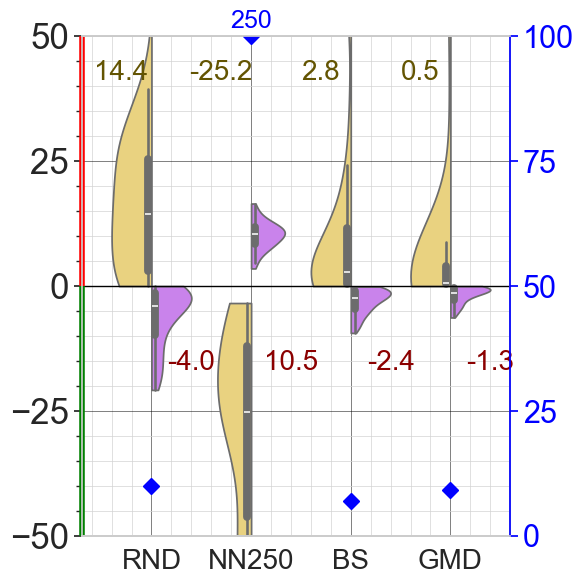

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.collections import LineCollection

datalist_time = [rnd['penalty'], nn250['penalty'], bs['penalty'], gmd['penalty']]
datalist_power = [rnd['penalty_power'], nn250['penalty_power'], bs['penalty_power'], gmd['penalty_power']]
categories = ['RND', 'NN250', 'BS', 'GMD']

data_time_flat = [item for sublist in datalist_time for item in sublist]
data_power_flat = [item for sublist in datalist_power for item in sublist]
labels_time = [categories[i] for i, sublist in enumerate(datalist_time) for item in sublist]
labels_power = [categories[i] for i, sublist in enumerate(datalist_power) for item in sublist]
type_time = ['time'] * len(data_time_flat)
type_power = ['power'] * len(data_power_flat)

combined_data = data_time_flat + data_power_flat
combined_labels = labels_time + labels_power
combined_types = type_time + type_power

# Create a DataFrame
df = pd.DataFrame({
    'Penalty': combined_data,
    'Strategy': combined_labels,
    'type': combined_types
})

sns.set(style="whitegrid")

colors = {'time': '#fadc6f', 'power': '#cf71fd'}

fig, ax = plt.subplots(figsize=(6, 6))
ax.spines["left"].set_visible(False)
sns.violinplot(x='Strategy', y='Penalty', hue='type', data=df, palette=colors, split=True, scale="count", cut=0, ax=ax)
ax.set_xlabel('')
if model == "resnet":
    ax.set_ylabel('Excess Over Optimal', fontsize=28)
else:
    ax.set_ylabel('', fontsize=22)
    
ax.axhline(0, color='black', linewidth=1)

medians_time = [np.nanmedian(data) for data in datalist_time]
medians_power = [np.nanmedian(data) for data in datalist_power]

for i, median in enumerate(medians_time):
    ax.text(i-0.3, 40, f"{median:.1f}", color='#635402', ha='center', va='bottom', fontsize=20)

for i, median in enumerate(medians_power):
    ax.text(i+0.4, -18, f"{median:.1f}", color='#8B0000', ha='center', va='bottom', fontsize=20)

ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black', alpha=0.7)
ax.grid(which='minor', linestyle='-', linewidth='0.5', color='lightgray')
ax.set_axisbelow(True)

if model == 'yolo':
    upper = 101
    lower = -100
else:
    upper = 51
    lower = -50

# Create LineCollection to color y-axis differently for negative and positive values
colors_y_axis = ["green" if y < 0 else "red" for y in range(lower, upper)]
y_ticks = list(range(lower, upper))
x_ticks = [0] * len(y_ticks)
points = np.array([x_ticks, y_ticks]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = LineCollection(segments, colors=colors_y_axis, linewidth=4, transform=ax.get_yaxis_transform(), clip_on=False)
ax.add_collection(lc)

ax.spines["left"].set_visible(False)  # Hide the left spine
if model == 'yolo':
    ax.set_ylim(-100, 100)
else:
    ax.set_ylim(-50, 50)

if model == 'yolo':
    ax.set_yticks(np.arange(lower, upper, 50))

else:
    ax.set_yticks(np.arange(lower, upper, 25))

ax.tick_params(axis='y', labelsize=25)

ax2 = ax.twinx()
for i, value in enumerate(mean_tries_list):
    ax2.plot(i, value, marker='D', markersize=8, color='blue', linestyle='None')

ax2.text(categories.index('NN250'), 103, f'{250}', ha='center', va='center', fontsize=18, color='blue')

ax2.set_ylim(0, 100)
ax2.set_yticks([0, 25, 50, 75, 100])
ax2.tick_params(axis='y', labelsize=22, colors='blue')
ax2.spines['right'].set_color('blue')
if model == 'lstm':
    ax2.set_ylabel('# Profiling Runs', fontsize=28, color='blue')
ax2.grid(False)

ax.set_xticklabels(categories, fontsize=20)

if model == 'resnet':
    ax.text(-1.75, +5, '(W)', color='#b420fd', fontsize=26, rotation=90)
    ax.text(-1.75, -8, '(%)', color='#f7c81e', fontsize=26, rotation=90)
    ax.legend().remove()

elif model == 'yolo':
    ax.legend(fontsize=20, loc='lower left', bbox_to_anchor=(0, 0.09))

else:
    ax.legend().remove()
    
plt.tight_layout()
plt.savefig('Dual_Violin_train_'+model+'.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()
